In [1]:
import tensorflow as tf
import numpy as np
from IJCAI19.module.load_data import *
from IJCAI19.module.official_model import *

%matplotlib inline

Using TensorFlow backend.


In [2]:
IMAGE_SIZE = 224

In [3]:
name = 'inception_v1'
M = ModelFactory(name=name)
M.load_model(IMAGE_SIZE=IMAGE_SIZE)
M.load_weight()


Loading model check point from model/inception_v1/inception_v1.ckpt
INFO:tensorflow:Restoring parameters from model/inception_v1/inception_v1.ckpt


In [71]:
IMAGE_SIZE = 224
(X,Y) = load_dev_data(IMAGE_SIZE=IMAGE_SIZE)
print(X.shape, Y.shape)
X = X/255

(110, 224, 224, 3) (110, 110)


In [5]:
from art.classifiers import TFClassifier
from art.attacks.deepfool import DeepFool

classifier = TFClassifier((0, 255), M.imgs_holder, M.op_logits, loss=M.op_loss, train=None, output_ph=M.labels_holder, sess=M.sess)


In [8]:
adv_crafter = DeepFool(classifier)
p = Profile('DeepFool')
Xadv = adv_crafter.generate(X)
p.stop()
Yadv = classifier.predict(Xadv)

acc = np.sum(np.equal(np.argmax(Yadv, axis=1), np.argmax(Y, axis=1))) / Y.shape[0]
print("\nAccuracy on adversarial samples: %.2f%%" % (acc * 100))

KeyboardInterrupt: 

In [75]:
from art.attacks.fast_gradient import FastGradientMethod
attacker = FastGradientMethod(classifier, eps=0.05)
p = Profile('FastGradientMethod')
Xadv = attacker.generate(X)
p.stop()

FastGradientMethod 29.541035413742065


29.541035413742065

In [76]:
Yadv = classifier.predict(Xadv)
acc = np.sum(np.equal(np.argmax(Yadv, axis=1), np.argmax(Y, axis=1))) / Y.shape[0]
print("\nAccuracy on adversarial samples: %.2f%%" % (acc * 100))


Accuracy on adversarial samples: 8.18%


In [77]:
Ypred = classifier.predict(X)
acc = np.sum(np.equal(np.argmax(Ypred, axis=1), np.argmax(Y, axis=1))) / Y.shape[0]
print("\nAccuracy on orignal samples: %.2f%%" % (acc * 100))


Accuracy on adversarial samples: 88.18%


In [58]:
p = Profile('FGM')
Xadv = attacker.generate(np.expand_dims(X[0],0))
p.stop()

FGM 0.30906176567077637


0.30906176567077637

In [59]:
Yadv = classifier.predict(Xadv/255)
Yadv.argmax(1)

array([17], dtype=int64)

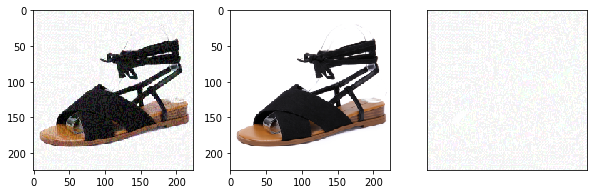

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.subplot(331)
fig=plt.imshow(Xadv[0])
plt.subplot(332)
fig=plt.imshow(X[0])
plt.subplot(333)
fig=plt.imshow(1 + Xadv[0]-X[0])
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()

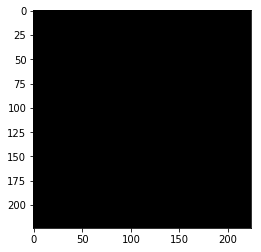

In [52]:
plt.imshow((Xadv[0]-X[0])/255)
plt.show()

In [66]:
Yadv = classifier.predict(X/255)

acc = np.sum(np.equal(np.argmax(Yadv, axis=1), np.argmax(Y, axis=1))) / Y.shape[0]
print("\nAccuracy on adversarial samples: %.2f%%" % (acc * 100))


Accuracy on adversarial samples: 88.18%


In [82]:
Yadv.argmax(1)

array([ 74,  77,  37,  65,  13,  30,  60,  28,  63, 106,  26,  47,  22,
        34,  58,  36,  74,  86,  30,  36,  90,  46, 107, 107, 103,  57,
        72,   4,  32,  58,   1,  28,  57, 102,  36, 109, 101, 100,  52,
        85, 108,   2,  70,   1,  12, 109,  26,  90, 105,   4,  69,  42,
         1,  93,  50,  45,  85,  59,  56,  42,  98,  81, 101,  51,  58,
       103,  57,  75,  51,  56,  26, 102,  93,  74,  56, 102,  18, 102,
        66,  34,  86,  57,  73,  60,  85,  75,  28,  24, 102, 105, 109,
        75, 108,  35,  36, 104,  62,  73,  68,  46,  43,  76,  49,  27,
         5,  47,  85,  58,  75,  75], dtype=int64)

In [83]:
Y.argmax(1)

array([ 17,  13,  66,  10,  57,  35,  47, 107,  27,  31,  15,  40,   5,
        78,  52,  37,  21,  58,  55,  50,  88, 101, 102, 105,  75,   7,
         8,  18,  84,  48,   2,  54,   4,  62,  46,  28,  24, 100,  16,
        14,  34,  82,  70,   1,  32, 109,  72,  51,  33,  69,  59,   0,
        26,  41,  92,   9,  89,  67,  83,  61,   6,  81,  97,  95,  11,
        85,  30,  45, 103,  39,  71,  96,  93, 106,  90,  77,  98,  94,
         3,  99,  12,  73,  74,  22,  60,  43,  53,  87,  36,  64,  42,
        65, 108,  38,  49,  79,  44,  29,  68,  23,  56,  76, 104,  91,
        25,  20,  63,  80,  19,  86], dtype=int64)

In [84]:
Ypred.argmax(1)

array([ 17,  13,  66,  80,  57,  35,  47, 107,  27,  31,  81,  40,  65,
        78,  52,  37,  21,  58,  55,  50,  88, 101, 102, 105,  75,   7,
         8,  18,  84,  48,   2,  54,   4,  62,  46,  28,  24,   8,  16,
        14,  34,  39,  70,  72,  32, 109,  72,  46,  33,  69,  59,   0,
        26,  41,  92,   9,  89,  67,  83,  40,   6,  90,  97,  95,  11,
        85,  30,  45, 103,  39,  71,  96,  93, 106,  90,  77,  98,  94,
         3,  99,  12,  73,  74,  22,  60,  43,  53,   0,  36,  64,  42,
        65,  68,  38,  49,  79,  44,  29,  68,  23,  56,  49, 104,  50,
        25,  20,  63,  80,  19,  86], dtype=int64)

In [89]:
(Xadv[0] - X[0]).mean()

-0.016891563

In [93]:
np.linalg.norm(Xadv[0]*255 - X[0]*255)

4004.4722

In [94]:
np.sqrt(np.sum(np.square(Xadv[0] - X[0])))*255

4004.4726991653442